## [[데이콘] 전복 나이 예측 경진대회](https://dacon.io/competitions/official/235877/overview/description)
[참고 자료](https://dacon.io/competitions/official/235877/codeshare/4717?page=1&dtype=recent)

- id : 샘플 아이디
- Gender : 전복 성별(I: Infant(유충))
- Lenght : 전복 길이
- Diameter : 전복 둘레
- Height : 전복 키 
- Whole Weight : 전복 전체 무게
- Shucked Weight : 껍질을 제외한 무게
- Viscra Weight : 내장 무게
- Shell Weight : 껍질 무게
- Target : 전복 나이

## 1. 데이터 로드

In [1]:
# 모듈 불러오기
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('data/전복 나이 예측 경진대회/train.csv')
train.drop('id', inplace = True, axis=1)

test = pd.read_csv('data/전복 나이 예측 경진대회/test.csv')
test.drop('id', inplace = True, axis=1)

sample_submission = pd.read_csv('data/전복 나이 예측 경진대회//sample_submission.csv')

In [3]:
train.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [4]:
test.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight
0,F,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550
1,M,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600
2,I,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305
3,M,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300
4,F,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050


### 1) 데이터 셋 split(train, test)

In [5]:
print(train.shape)
print(test.shape)

(1253, 9)
(2924, 8)


In [6]:
# 학습 데이터에 대한 전반적인 데이터 정보를 살펴봅니다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          1253 non-null   object 
 1   Lenght          1253 non-null   float64
 2   Diameter        1253 non-null   float64
 3   Height          1253 non-null   float64
 4   Whole Weight    1253 non-null   float64
 5   Shucked Weight  1253 non-null   float64
 6   Viscra Weight   1253 non-null   float64
 7   Shell Weight    1253 non-null   float64
 8   Target          1253 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 88.2+ KB


## 2. 결측치 및 이상치 확인, 제거

In [7]:
train.isnull().sum()

Gender            0
Lenght            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscra Weight     0
Shell Weight      0
Target            0
dtype: int64

In [8]:
# !pip install missingno

[missingno](https://hong-yp-ml-records.tistory.com/14): 결측데이터들을 파악하는데 직관적인 도움을 주는 패키지


In [9]:
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline

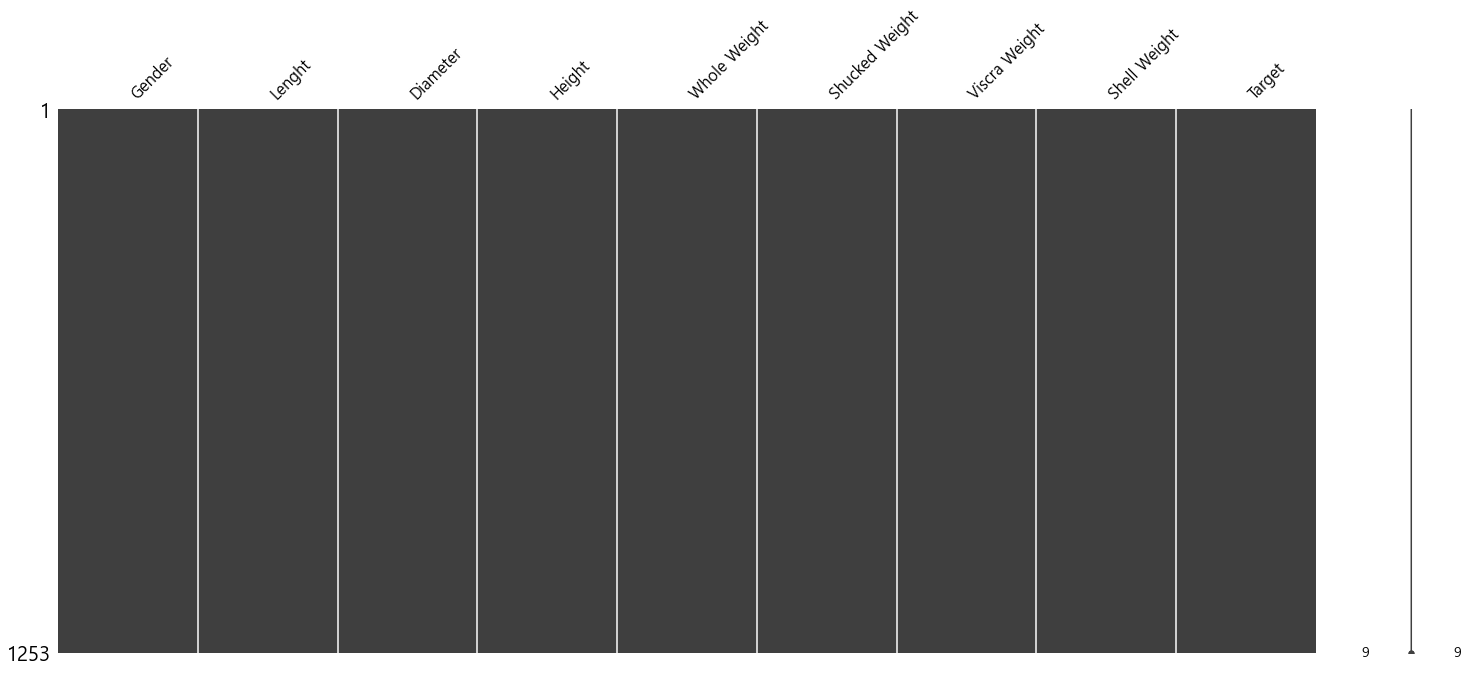

In [10]:
# matirx version
plt.rc('font', family = 'Malgun Gothic')
msno.matrix(train)
plt.show()

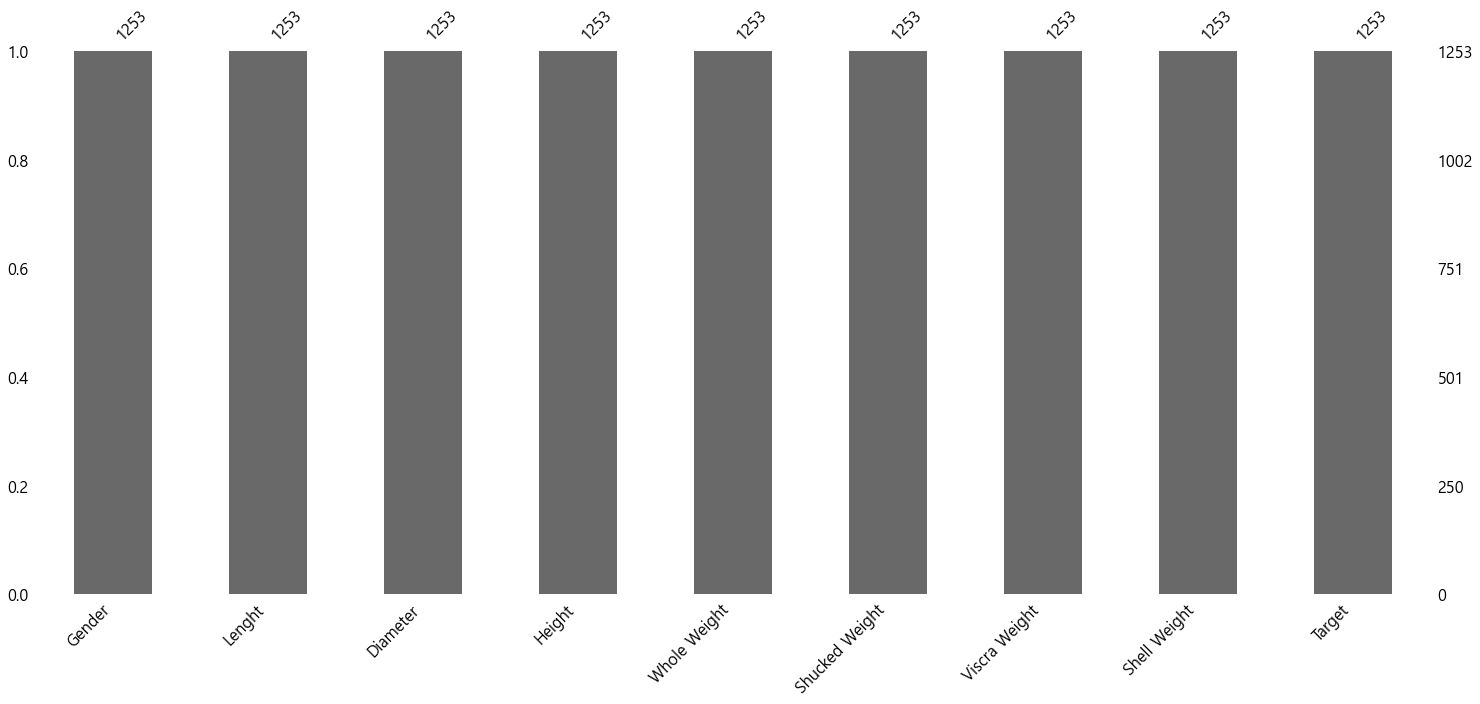

In [11]:
# barchart version
msno.bar(train)
plt.show()

### 2) 이상치를 확인하기 위해서는 변수별 EDA를 수행해야 한다.

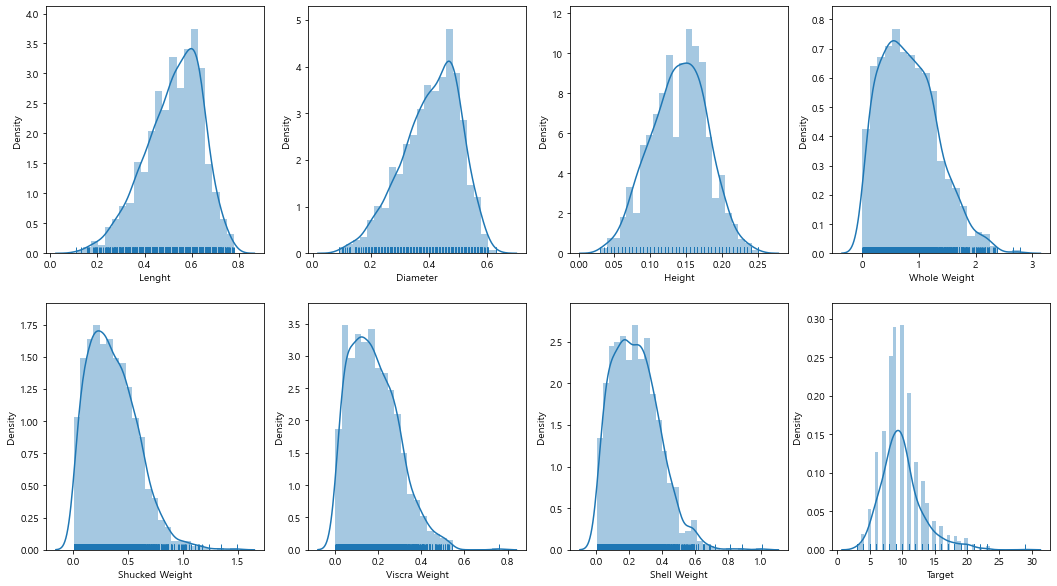

In [12]:
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore') # 경고 메시지 무시, 다시 활성화하고 싶을 때 → warnings.filterwarnings(action='default')

# 컬럼별 Data 분포 히스토그램
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (18, 10))

num = 0
ax = ax.flatten() # 2*4행렬을 순차적으로 불러오기 위해 flatten 함수 사용

for col in list(train.columns[1:]):
    sns.distplot(train[col], ax = ax[num], kde = True, rug = True) # kde True는 확률 밀도 곡선이 나오고, rug는 하부에 밀도 분포표시
    num += 1    
    
plt.show()

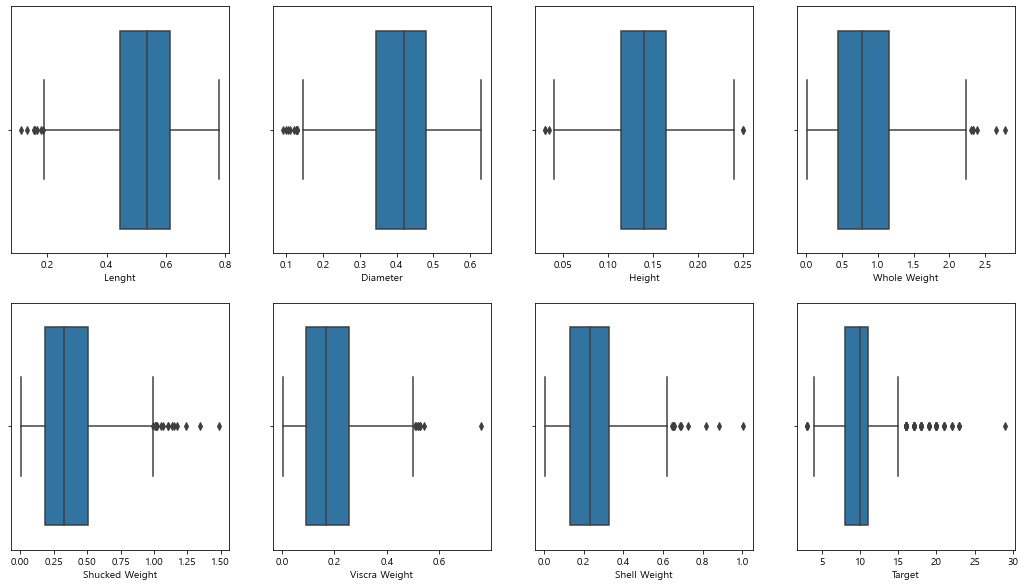

In [13]:
#컬럼별 Data 분포 Boxplot
fig, ax = plt.subplots(2, 4, figsize = (18, 10))

num = 0
ax = ax.flatten()

for col in list(train.columns[1:]):
    sns.boxplot(train[col], ax=ax[num])
    num += 1
    
plt.show()

<AxesSubplot:xlabel='Target', ylabel='Count'>

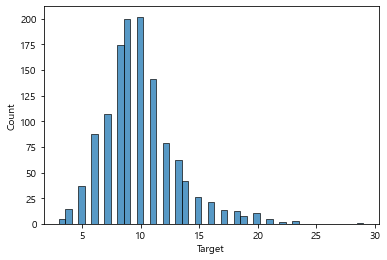

In [14]:
sns.histplot(train['Target'])

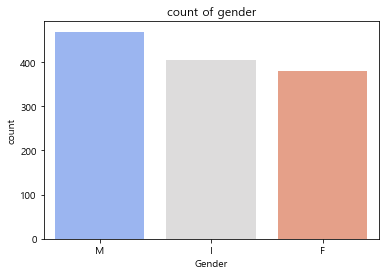

In [15]:
sns.countplot(train['Gender'], palette='coolwarm')
plt.title('count of gender')
plt.show()

In [16]:
for i, col in enumerate(train.columns[1:]):
    print(i, col)

0 Lenght
1 Diameter
2 Height
3 Whole Weight
4 Shucked Weight
5 Viscra Weight
6 Shell Weight
7 Target


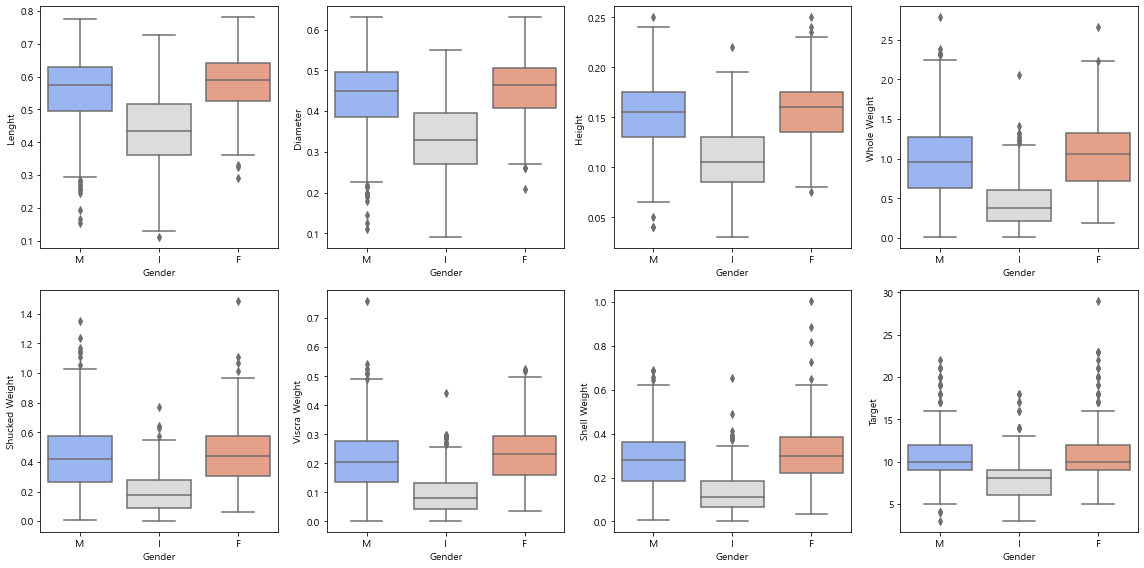

In [17]:
# 성별에 따른 각 feature 상자그림
fig = plt.figure(figsize = (16, 8))

for i, col in enumerate(train.columns[1:]):
    fig.add_subplot(2, 4, i + 1)
    sns.boxplot(data = train, x = 'Gender', y = col, palette='coolwarm')
    
plt.tight_layout()    
plt.show()

In [18]:
train.columns[1:]

Index(['Lenght', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight',
       'Viscra Weight', 'Shell Weight', 'Target'],
      dtype='object')

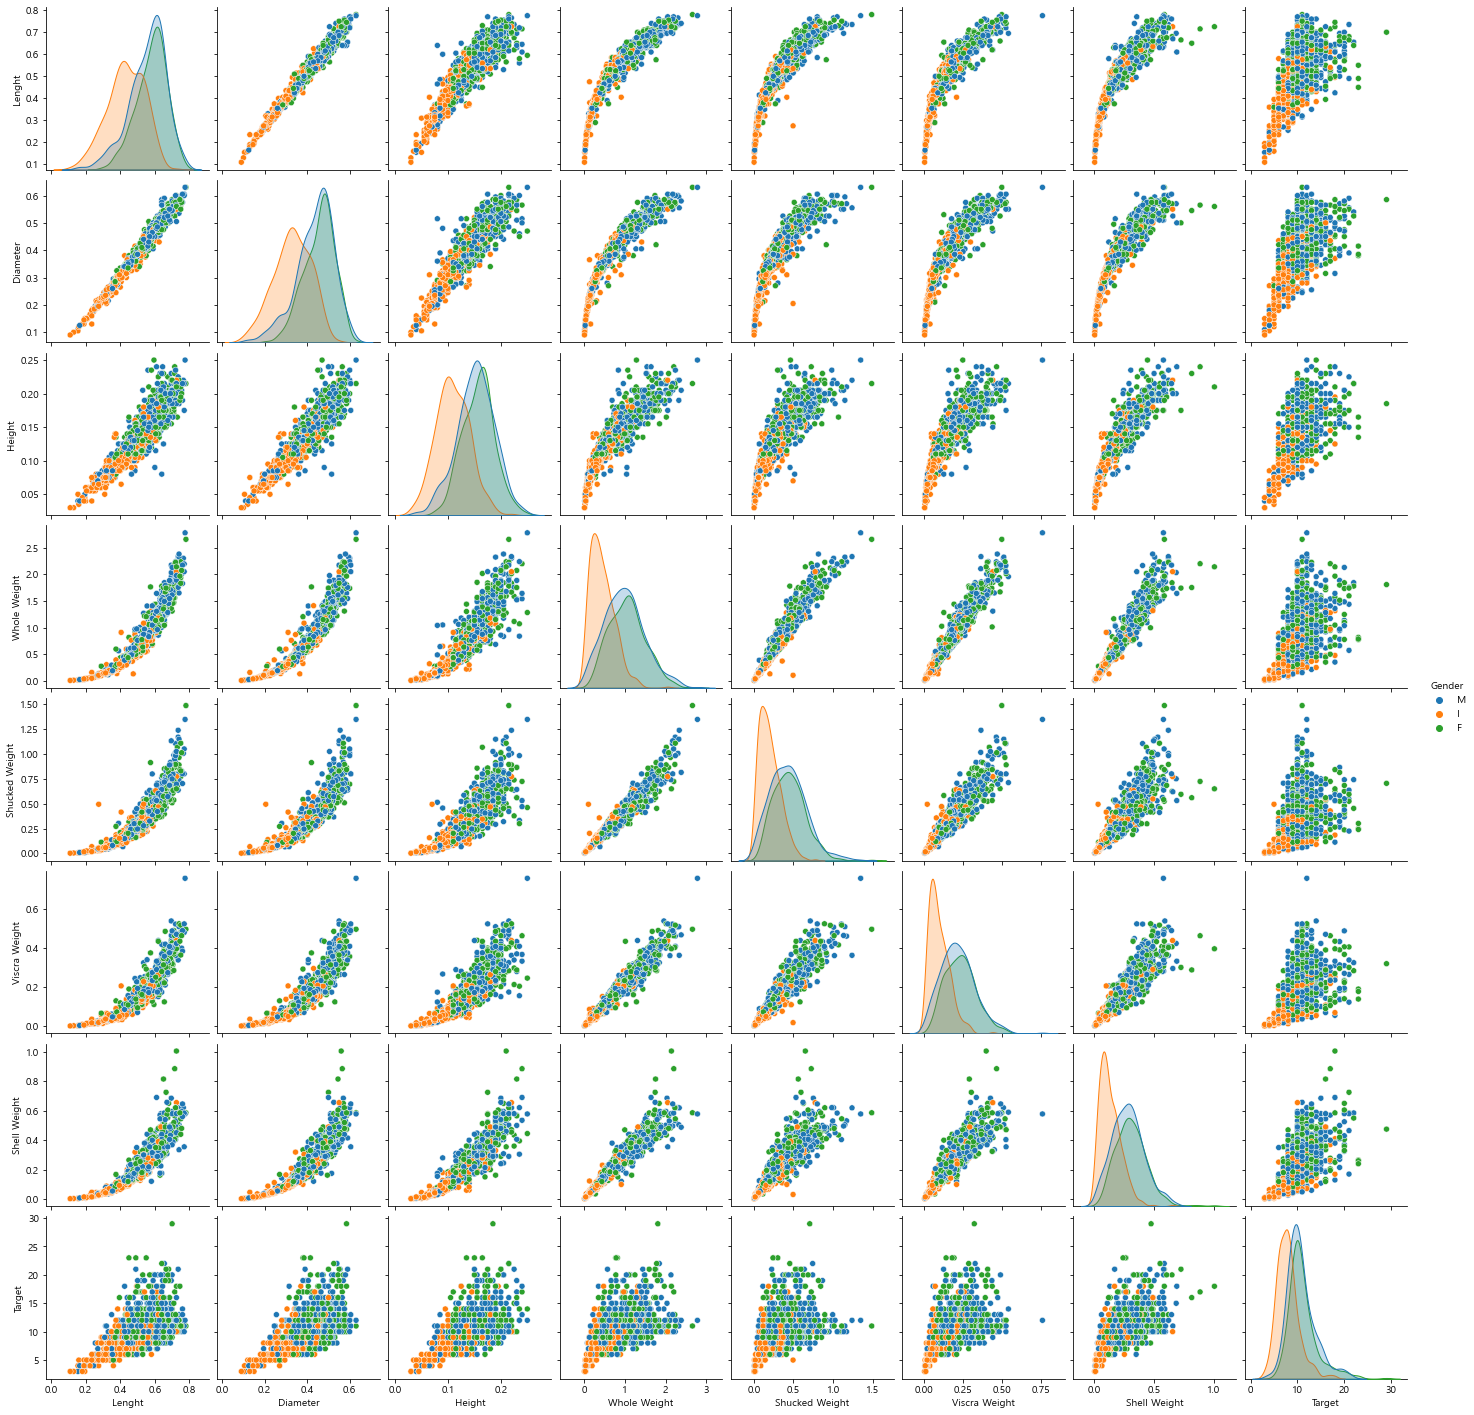

In [19]:
sns.pairplot(train, hue = 'Gender')
plt.show()

### 3) 이상치 제거(방법, 우리는 미적용)
[any(axis=1) 설명](https://ralasun.github.io/code%20snippet/2020/12/01/any-all-usage/)
- index별로 column요소를 다 훑어서 적어도 하나의 column에 True가 있으면 True를 반환합니다.

훈련 데이터 Shape:  (112, 9)
교과서 방법으로 이상치가 제거된 모습


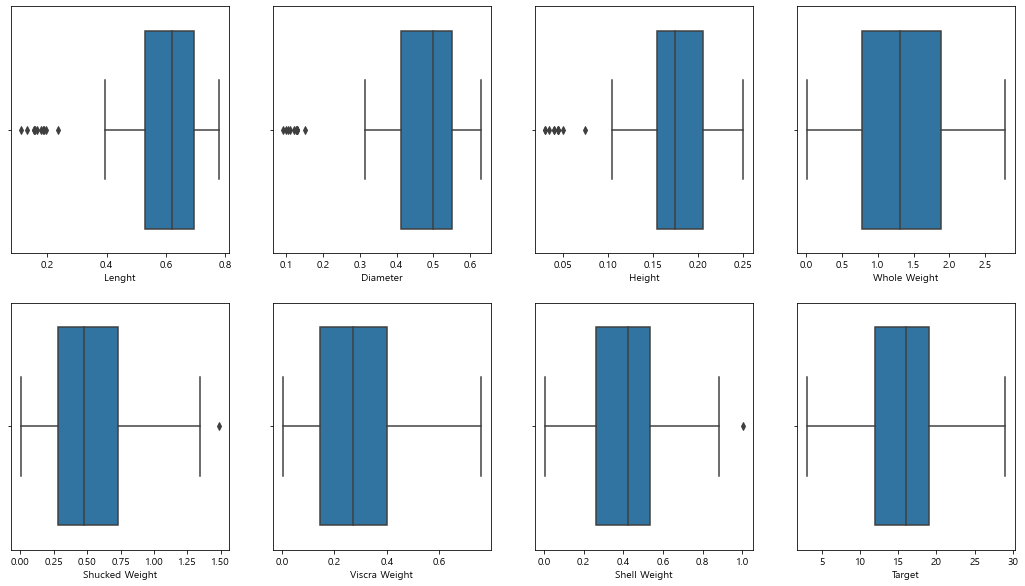

In [20]:
quartile_1 = train.quantile(.25)
quartile_3 = train.quantile(.75)

IQR = quartile_3 - quartile_1
condition = (train < (quartile_1 - 1.5*IQR)) | (train > (quartile_3 + 1.5*IQR))
condition = condition.any(axis = 1)
train_cond = train[condition] # True값(이상치에 해당하는 값)만 추출된 train
print('훈련 데이터 Shape: ', train_cond.shape)

print('교과서 방법으로 이상치가 제거된 모습')
fig, ax = plt.subplots(2, 4, figsize = (18, 10))

num = 0
ax = ax.flatten()

for col in list(train_cond.columns[1:]):
    sns.boxplot(train_cond[col], ax = ax[num])
    num += 1
    
plt.show()

### 2-1. "전체 무게 < 전복 무게 + 껍질의 무게"인 경우, 삭제

In [21]:
train.columns

Index(['Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Target'],
      dtype='object')

In [22]:
train[train["Whole Weight"] < train["Shucked Weight"] + train["Shell Weight"]]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
47,I,0.380,0.275,0.095,0.1375,0.0860,0.0585,0.0605,7
382,I,0.455,0.330,0.100,0.3720,0.3580,0.0775,0.1100,8
435,I,0.475,0.365,0.100,0.1315,0.2025,0.0875,0.1230,7
847,I,0.230,0.165,0.060,0.0515,0.0190,0.0145,0.0360,4
1078,I,0.275,0.205,0.070,0.1055,0.4950,0.0190,0.0315,5


In [23]:
train = train[train["Whole Weight"] >= train["Shucked Weight"] + train["Shell Weight"]]

### 2-2. "전복 무게 < 내장 무게"인 경우, 삭제

In [24]:
train[train["Shucked Weight"] < train["Viscra Weight"]]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
465,M,0.415,0.315,0.125,0.388,0.068,0.09,0.125,12


In [25]:
train = train[train["Shucked Weight"] >= train["Viscra Weight"]]

### 2-3. "전체 무게 < (전복 무게 + 내장 무게 + 껍데기 무게)"인 경우, 삭제

In [26]:
train[(train['Whole Weight'] - (train['Shucked Weight'] + train['Viscra Weight'] + train['Shell Weight']))<0]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
119,I,0.375,0.280,0.080,0.2165,0.0935,0.0925,0.0700,7
129,I,0.485,0.365,0.140,0.4475,0.1895,0.0925,0.2305,8
179,I,0.215,0.155,0.060,0.0525,0.0210,0.0165,0.0150,5
224,I,0.450,0.335,0.105,0.4470,0.2335,0.1530,0.1190,7
290,F,0.480,0.380,0.145,0.5900,0.2320,0.1410,0.2300,12
324,I,0.420,0.330,0.100,0.3520,0.1635,0.0890,0.1000,9
346,I,0.260,0.215,0.080,0.0990,0.0370,0.0255,0.0450,5
368,I,0.290,0.225,0.075,0.1520,0.0710,0.0590,0.0450,9
374,I,0.360,0.275,0.095,0.2170,0.0840,0.0435,0.0900,7
418,I,0.410,0.330,0.105,0.3350,0.1525,0.0740,0.1100,7


In [27]:
train = train[(train['Whole Weight'] - (train['Shucked Weight'] + train['Viscra Weight'] + train['Shell Weight']))>=0]

## 3. 파생변수 생성

### 3-1. 전복이 머금은 물의 양
water 무게 = 전체 무게 - (껍질을 제외한 무게 + 껍질 무게)

In [28]:
train["Shell Water"] = round(train["Whole Weight"] - (train["Shucked Weight"] + train["Shell Weight"]),3)
test["Shell Water"] = round(test["Whole Weight"] - (test["Shucked Weight"] + test["Shell Weight"]),3)

### 3-2. 전체 무게 중에 순살 비율
ratio = 껍질을 제외한 무게 / 전체 무게

In [29]:
train["ratio"] = round(train["Shucked Weight"] / train["Whole Weight"],3)
test["ratio"] = round(test["Shucked Weight"] / test["Whole Weight"] ,3)

### 3-3. 전복의 실수율(밀도)
쉽게생각해서 대게를 먹으러 갔다고 생각하자. 대게 크기만 크고 살은 없는 것은 나이가 많거나 오래된 대게이다. 이를 **실수율**이라고 한다.

**density(밀도) = 전복의 무게 / 전복의 크기(부피)** 면적을 편의상 length x diameter x height 로 한다.

In [30]:
train["density"] = round(train["Shucked Weight"] / (train["Lenght"]* train["Diameter"] * train["Height"]),3)
test["density"] = round(test["Shucked Weight"] / (train["Lenght"]* train["Diameter"] * train["Height"]),3)

## 4. 변수 선택
변수 선택을 위해 각 변수의 영향도 검토 작업 필요

In [31]:
train.columns

Index(['Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Target',
       'Shell Water', 'ratio', 'density'],
      dtype='object')

### 4-1. 각 변수간 상관관계 파악

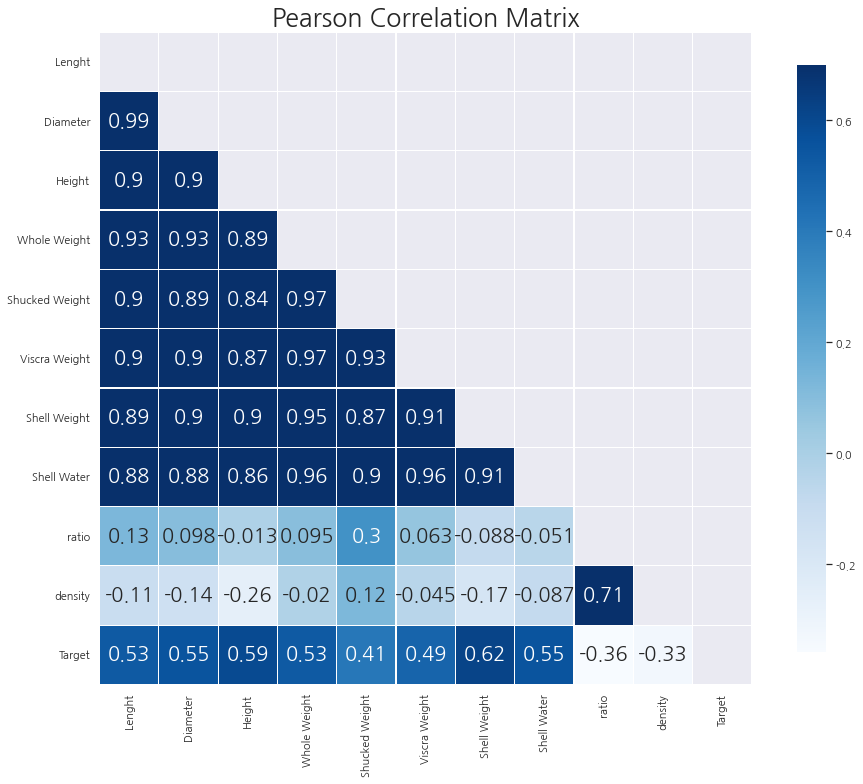

In [32]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns
sns.set(font="NanumGothic")

import warnings
warnings.filterwarnings(action='ignore')

features = ['Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight', 
       'Shell Water', 'ratio','density', 'Target']


# 삼각형 마스크를 만듦
mask = np.zeros_like(train[features].corr(), dtype=np.bool) # 우선 상관관계표와 형태가 같고 0이 들어있는 매트릭스를 만들어 준다. 12 x 12 Matrix
mask[np.triu_indices_from(mask)] = True # np.triu_indices_from : mask에서 인덱스를 반환 (위쪽 삼각형에 True, 아래 삼각형에 False)

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(train[features].corr(),
            linewidths=0.25,# 경계면 선구분 cf. 실선(0.5)으로 구분하기
            vmax=0.7, # 컬러바 범위 : 최소값 미지정 최대값 0.7 
            square=True,
            cmap="Blues", #히트맵 색깔. blue, green #"BuGn_r" to reverse # Blues # BuGn
            linecolor='w',# 라인 색은 흰색(white)
            
            annot=True,            # 실제 값을 표시한다
            annot_kws={"size":20},  # 실제 값 폰트 사이즈
            mask=mask,             # 위에서 설정한 마스크 부분(가릴부분) 지정한다
            cbar_kws={"shrink": .9}); # 오른쪽 컬러바 크기 줄이기 90% 크기

In [33]:
# 타겟값과 각 변수들 간의 상관관계를 그린다.
co = train.corrwith(train['Target'])

# 상관계수 내림차순 정렬
print(co.sort_values(ascending=False))

# 절댓값
co_abs = abs(co)

Target            1.000000
Shell Weight      0.618416
Height            0.593662
Diameter          0.554279
Shell Water       0.551306
Lenght            0.529383
Whole Weight      0.526969
Viscra Weight     0.487294
Shucked Weight    0.407990
density          -0.326457
ratio            -0.357459
dtype: float64


In [34]:
# 상관계수의 절댓값 내림차순 정렬
co_sort = co_abs.sort_values(ascending=False)
co_sort = co_sort[co_sort > 0.1]
co_sort.to_frame().index # to_frame: 데이터프레임으로 변환

# 상관관계가 낮은 변수 제거 후, 새로운 변수 구성
new_features= co_sort.to_frame().index
new_features

Index(['Target', 'Shell Weight', 'Height', 'Diameter', 'Shell Water', 'Lenght',
       'Whole Weight', 'Viscra Weight', 'Shucked Weight', 'ratio', 'density'],
      dtype='object')

In [35]:
print(len(features))
print(len(new_features))

print('제거된 변수의 갯수 :{}개'.format(len(features) - len(new_features)))

11
11
제거된 변수의 갯수 :0개


### 4-2. 범주형 변수 변환

In [36]:
train = pd.get_dummies(train)
train.head()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,Shell Water,ratio,density,Gender_F,Gender_I,Gender_M
0,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15,0.412,0.352,12.003,0,0,1
1,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8,0.099,0.463,13.600,0,1,0
2,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18,0.376,0.403,9.573,0,1,0
3,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13,0.385,0.431,14.452,0,0,1
4,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6,0.039,0.378,7.321,0,1,0


In [37]:
test = pd.get_dummies(test)
test.head()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Shell Water,ratio,density,Gender_F,Gender_I,Gender_M
0,0.595,0.470,0.155,1.121,0.4515,0.1780,0.1550,0.514,0.403,13.807,1,0,0
1,0.580,0.450,0.150,0.927,0.2760,0.1815,0.3600,0.291,0.298,21.449,0,0,1
2,0.260,0.205,0.070,0.097,0.0415,0.0190,0.0305,0.025,0.428,0.749,0,1,0
3,0.590,0.460,0.130,1.102,0.4550,0.2055,0.3300,0.317,0.413,12.000,0,0,1
4,0.595,0.465,0.140,1.113,0.5175,0.2440,0.3050,0.290,0.465,78.929,1,0,0


### 4-3. Data Set 정리

In [38]:
X = train.drop(columns=['Target'], axis = 1)
y = train['Target']

In [39]:
X.shape

(1210, 13)

## 5. 데이터 정규화(Data normalization)

[transform()과 fit_transform()의 차이](https://deepinsight.tistory.com/165)

[종류]

- StandardScaler: 기본 스케일. 평균0과 표준편차1 사용. 정규분포로 만들어줌. 회귀보다 분류에 적합
- MinMaxScaler: 최대/최소값이 각각 1, 0이 되도록 스케일링. 분류보다 회귀에 적합
- MaxAbsScaler: 최대 절대값이 0과 1 사이가 되도록 스케일링
- RobustScaler: 중앙값(median)을 0, IQR(interquartile range)을 1이 되도록 스케일링. 아웃라이어의 영향을 최소화

[용어정리]

- 스케일링(Scaling), 정규화(Normalization), 표준화(Standardization) 여러 용어 > 번역이 되면서 더 혼란
- 영어에서 "scaling" 크기를 맞춰주는 작업으로 이해하면 됩니다.
- 특히 "정규화" 라는 용어는 향후 딥러닝에서 BatchNormalization, Normalizer, Regularizer 등 다른 용도로도 사용되므로 주의

[주의사항]

- 스케일링의 경우에도 test 데이터를 fit 해서는 안됨 > train 데이터에 대해서만 fit 이후에 train 과 test set에 대해 transform
- 머신러닝 딥러닝 모델이 학습을 하는 과정에서 어떠한 방식으로든 test set 데이터를 사용하면 안 됨.

→ 회귀에 적합한 Min-Max Scaler를 사용한다.

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2, random_state=1)

In [41]:
# 피쳐 스케일링
scaler = MinMaxScaler()

X_train_norm = scaler.fit_transform(X_train)
X_valid_norm = scaler.fit_transform(X_valid)

### **평가지표**

In [42]:
def NMAE(true, pred):
    score = np.mean(np.abs(true - pred) / true)
    return score

## 6. 모델생성 및 학습

### 6-0. AUTO ML(Automated machine learning) - Pycaret

자동화된 기계 학습(AutoML)은 기계학습을 실제 문제에 적용하는 작업을 자동화하는 프로세스.  
AutoML에는 원시 데이터 세트에서 시작하여 배포 준비가 된 머신 러닝 모델 구축에 이르기까지 모든 단계를 자동화

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm
import os
import warnings

In [44]:
# !pip install scipy
# !pip install markupsafe
# !pip install pycaret
from pycaret.regression import*

exp_reg101 = setup(data = train, target = 'Target', session_id = 123) # 데이터, 타겟y값, 재현을 위한 session_id 임의로 설정

,Description,Value
0,session_id,123
1,Target,Target
2,Original Data,"(1210, 14)"
3,Missing Values,False
4,Numeric Features,13
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(846, 13)"


In [45]:
add_metric('NMAE', 'NMAE', NMAE, greater_is_better = False) # add metric을 사용하면 pycaret에 custom metric을 사용할 수 있음

Name                                                       NMAE
Display Name                                               NMAE
Score Function            <function NMAE at 0x000002A7BAD331F0>
Scorer               make_scorer(NMAE, greater_is_better=False)
Target                                                     pred
Args                                                         {}
Greater is Better                                         False
Custom                                                     True
Name: NMAE, dtype: object

In [46]:
top5 = compare_models(sort='NMAE', n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,NMAE,TT (Sec)
huber,Huber Regressor,1.5421,4.9142,2.1909,0.4989,0.1770,0.1490,0.1490,0.0350
rf,Random Forest Regressor,1.5531,4.8055,2.1785,0.5060,0.1770,0.1534,0.1534,0.3130
lr,Linear Regression,1.5522,4.6895,2.1435,0.5206,0.1768,0.1553,0.1553,1.2100
et,Extra Trees Regressor,1.5719,4.9760,2.2121,0.4911,0.1798,0.1553,0.1553,0.2530
gbr,Gradient Boosting Regressor,1.5780,4.9908,2.2198,0.4839,0.1800,0.1555,0.1555,0.1350
br,Bayesian Ridge,1.5533,4.6843,2.1412,0.5212,0.1766,0.1556,0.1556,0.0130
lar,Least Angle Regression,1.5569,4.7051,2.1466,0.5194,0.1771,0.1559,0.1559,0.0230
ridge,Ridge Regression,1.5979,4.9600,2.2035,0.4937,0.1837,0.1618,0.1618,0.0240
lightgbm,Light Gradient Boosting Machine,1.6589,5.3596,2.2979,0.4500,0.1894,0.1650,0.1650,0.6640
xgboost,Extreme Gradient Boosting,1.7193,5.7985,2.3926,0.4014,0.1952,0.1695,0.1695,0.6080
